In [1]:
%matplotlib inline

In [2]:
import numpy as np

from msslib.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import functools as f

from sklearn import metrics

In [3]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [10]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"
comp_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/nearest_centroid/C/"

comp_paths = listpaths(comp_dir)
label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in comp_paths]

load_comps = map(lambda x: np.load(x).flatten(), comp_paths)
comps = f.reduce(lambda x,y: np.append(y, x), load_comps)

load_labels = map(lambda x: misc.imread(x).flatten(), label_paths)
labels = f.reduce(lambda x,y: np.append(y, x), load_labels)

p,r,fs,_ = metrics.precision_recall_fscore_support(labels, comps, average='weighted')

res1 = {'precision': p,
       'recall': r,
       'fscore': fs,
       'c_matrix': metrics.confusion_matrix(labels, comps)
      }

In [11]:
res1

{'c_matrix': array([[ 3235653,   131737,    22366,    63087,   547754],
        [ 8793479, 43312891,  3569284, 10643623,  3887982],
        [    8737,   620524, 13392557,  5281624,  1114329],
        [    3901,    86057,   226378,  1365556,    29801],
        [    5130,   462091,  5456215,  7061710, 22437534]]),
 'fscore': 0.7021084570082885,
 'precision': 0.83305101725987607,
 'recall': 0.63558129174256228}

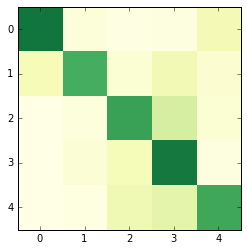

In [12]:
plot_confusion_matrix(plt, res1)

In [ ]:
#import functools as f
#label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"
comp2_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/nearest_centroid/B/"

comp2_paths = listpaths(comp_dir)
#label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in comp_paths]

load_comps = map(lambda x: np.load(x).flatten(), comp2_paths)
comps2 = f.reduce(lambda x,y: np.append(y, x), load_comps)

#load_labels = map(lambda x: misc.imread(x).flatten(), label_paths)
#labels = f.reduce(lambda x,y: np.append(y, x), load_labels)

p,r,fs,_ = metrics.precision_recall_fscore_support(labels, comps2, average='weighted')

res2 = {'precision': p,
       'recall': r,
       'fscore': fs,
       'c_matrix': metrics.confusion_matrix(labels, comps2)
      }

In [ ]:
res2

In [ ]:
plot_confusion_matrix(plt, res2)

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(9.2,10),sharex='col', sharey='row')

tick_marks = np.arange(len(mss_labels))
axes[0][0].set_yticklabels(['']+mss_labels)
axes[1][0].set_yticklabels(['']+mss_labels)
axes[2][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][1].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][2].set_xticklabels(['']+mss_labels,ha='right', rotation=45)

for a, s in zip(axes.flat, scores):
    a.set_title(s['label'][0])
    c_m = normalise_confusion_matrix(s['c_matrix'])
    im = a.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=70)
plt.colorbar(im, cax=cax, **kw)

In [ ]:
fig.savefig('c_matrix.png')

In [ ]:
fig = plt.figure()
fs = [s['fscore'] for s in scores]
labels = [s['label'][0] for s in scores]
del fs[6]
del labels[6]
x = range(len(fs))
plt.scatter(np.arange(len(fs)), fs, c='green', marker='D')
plt.xticks(x, labels)
plt.ylabel('F-score')
plt.xlabel('Test runs')

fig.savefig('scatter.png')

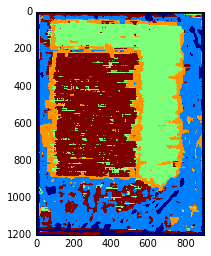

In [13]:
plt.imshow(comp)

In [17]:
comp.shape

(1200, 900)